In [249]:
#Importing relevant libraries
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns


In [251]:
# Read Excel File using pandas and storing in a dataframe
exl_file_path = '/Users/sameershekhar/Documents/Interview/PPI_CrossSell/test.xls'
sheetname = 'Data'
df = pd.read_excel(exl_file_path, sheet_name= sheetname)

# Performing Sanity Checks

In [252]:
# Visual Inspection of Data
df.head(5)

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,H,Y,0,S,F,37,R,P,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,180000,11563,31614,331,5,D,59,13,0,0,99,0,1,0,0,6,22,N,0,203,8,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,H,Y,0,M,M,154,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,369,199000,17563,26045,413,0,D,56,19,2,30,50,266,0,0,0,1,21,N,1,87,7,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,R,Y,0,M,M,82,G,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,216,120000,0,181217,1112,5,D,33,160,0,0,99,1,1,0,0,5,0,N,0,229,9,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,H,Y,2,M,M,342,S,F,P,6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,510,180000,60101,63811,435,0,D,49,62,0,0,99,0,0,0,0,1,13,N,0,38,6,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [253]:
# Visual Inspection of Data
df.tail(5)

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
16378,42067,952,X,60,5000.0,8.9,UnSecured,59,11,193,H,Y,0,S,F,57,P,F,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,FALS,TRUE,225,465000,230000,239597,1150,0,D,46,237,0,0,99,0,1,0,0,0,0,N,0,43,5,N,99,NaN,0,NaN,NaN,NaN,0,0,0
16379,42068,922,A,60,7500.0,7.9,UnSecured,55,10,1,H,Y,0,S,M,36,P,F,P,4,TRUE,TRUE,TRUE,FALSE,FALSE,FALS,FALSE,240,135000,122085,127002,639,4,D,32,124,0,0,99,0,0,0,0,2,0,N,0,50,8,N,99,NaN,0,NaN,NaN,NaN,0,0,0
16380,42069,831,C,60,1000.0,25.9,UnSecured,12,2,47,H,N,0,S,F,41,P,F,P,2,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,180,245000,110000,126399,930,0,D,30,109,0,0,99,0,0,0,0,1,1,N,0,187,9,N,99,LASU,1,758.0,LASU,Single,1,0,0
16381,42070,790,D,36,3000.0,25.9,UnSecured,9,2,130,H,Y,0,M,F,36,P,F,P,3,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,227,230000,76000,120809,513,0,D,58,80,0,0,99,0,3,2,1,2,9,N,0,421,9,N,99,LASU,1,758.0,LASU,Single,1,0,0
16382,42072,905,A,60,8460.0,7.9,UnSecured,44,8,180,H,Y,0,M,F,3,P,F,P,4,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,108,125000,470000,68270,582,0,D,53,47,0,0,99,0,0,0,0,3,14,N,0,229,7,N,99,NaN,0,NaN,NaN,NaN,0,0,0


### Observation
- Shape of Data : `[Rows: 16383, Columns:59]`

In [254]:
# Shape of Data
print(f"Shape of data: {df.shape}")

Shape of data: (16383, 59)


In [255]:
# Check the numerical columns
num_columns = [column for column in df.columns if df[column].dtypes != object]
print(num_columns)

['Ref', 'Credit_Score', 'Term', 'Net_Advance', 'APR', 'Mosaic', 'Mosaic_Class', 'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment', 'Income_Range', 'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R', 'Worst_History_CT', 'Age', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Searches___Total___L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Total___of_accounts', 'Time_since_most_recent_outstandi', 'PPI', 'code', 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']


In [256]:
# check the Categorical columns
cat_columns = [column for column in df.columns if df[column].dtypes == object]
print(cat_columns)

['Final_Grade', 'Loan_Type', 'Residential_Status', 'Telephone_Indicator', 'Marital_Status', 'Gender', 'Employment_Status', 'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express', 'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card', 'Payment_Method', 'Bankruptcy_Detected__SP_', 'CIFAS_detected', 'Insurance_Description', 'prdt_desc', 'category']


### Observations

- 37 Numerical Columns in this dataset:
`['Ref', 'Credit_Score', 'Term', 'Net_Advance', 'APR', 'Mosaic', 'Mosaic_Class', 'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment', 'Income_Range', 'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R', 'Worst_History_CT', 'Age', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Searches___Total___L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Total___of_accounts', 'Time_since_most_recent_outstandi', 'PPI', 'code', 'PPI_SINGLE', 'PPI_JOINT', 'PPI_LCI']`

- 22 Categoricaal Columns in this dataset:
`['Final_Grade', 'Loan_Type', 'Residential_Status', 'Telephone_Indicator', 'Marital_Status', 'Gender', 'Employment_Status', 'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Current_Account', 'ACCESS_Card', 'VISA_Card', 'American_Express', 'Diners_Card', 'Cheque_Guarantee', 'Other_Credit_Store_Card', 'Payment_Method', 'Bankruptcy_Detected__SP_', 'CIFAS_detected', 'Insurance_Description', 'prdt_desc', 'category']`

- Target Column: `['PIP]`

In [257]:
# Numerical & Categorical Column count
column_type = df.dtypes.reset_index()
column_type['Type'] = np.where(column_type.loc[:, 0].astype(str).isin(['int64', 'float64']), 'Numerical', 'Categorical')
column_type.groupby('Type').size()

Type
Categorical    22
Numerical      37
dtype: int64

### Observations

- 4 Numerical Columns have missing Values:
    - `Insurance_Description    6922`
    - `code                     6978`
    - `prdt_desc                7038`
    - `category                 6922`

In [258]:
# Missing Values
df.isnull().sum()[df.isnull().sum() > 0]

Insurance_Description    6922
code                     6978
prdt_desc                7038
category                 6922
dtype: int64

### Observations

- There are 0 duplicated values in this dataset.

In [259]:
# Duplicate Values
df.duplicated().sum()

0

In [260]:
# Check the correlation between cols

df.corr()['PPI']

Ref                                -0.019828
Credit_Score                       -0.138538
Term                                0.113851
Net_Advance                        -0.004268
APR                                 0.062558
Mosaic                              0.137154
Mosaic_Class                        0.070245
Time_at_Address                     0.092016
Number_of_Dependants               -0.045925
Time_in_Employment                 -0.019915
Income_Range                       -0.002952
Time_with_Bank                      0.037623
Value_of_Property                  -0.147606
Outstanding_Mortgage_Bal           -0.121374
Total_Outstanding_Balances         -0.128756
Bureau_Data___Monthly_Other_Co_R   -0.118847
Worst_History_CT                   -0.028789
Age                                 0.071761
Total_outstanding_balance__mortg   -0.129190
Total___Public_Info___CCJ____ban    0.097131
Total_value__Public_Info___CCJ__    0.034813
Time_since_most_recent_Public_In   -0.103805
Total_valu

### Observations
- 12 negative minimum valued variables: 
`['Age', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', '__of_status_3_s_L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Total___of_accounts', 'Time_since_most_recent_outstandi']`

In [261]:
# Describe the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ref,16383.0,21168.695294,12142.797527,1.0,10699.0,21303.0,31689.0,42072.0
Credit_Score,16383.0,882.061832,93.149605,352.0,818.0,882.0,947.0,1295.0
Term,16383.0,59.142892,26.689123,6.0,48.0,60.0,60.0,300.0
Net_Advance,16383.0,7364.007758,6673.343595,500.0,3000.0,5300.0,9000.0,75000.0
APR,16383.0,18.754587,9.662504,0.0,9.9,16.9,24.9,50.4
Mosaic,16383.0,29.419703,16.718957,0.0,16.0,25.0,44.0,99.0
Mosaic_Class,16383.0,5.352683,5.130278,1.0,3.0,4.0,8.0,99.0
Time_at_Address,16383.0,120.488128,109.192185,1.0,38.0,84.0,180.0,864.0
Number_of_Dependants,16383.0,0.808460,1.118947,0.0,0.0,0.0,1.0,30.0
Time_in_Employment,16383.0,103.096075,91.541972,0.0,38.0,72.0,144.0,600.0


### Check the Skewness of the Data

In [262]:
# Custom function for checking skewness of the data
def skewness(df:pd.DataFrame)->pd.DataFrame:
    try:
        skewness = []
        skewness_comment = []
        for name in num_columns:
            skew_score = round(skew(df[name],axis=0, bias=False ),2)
            skewness.append(skew_score)

            """
            If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

            If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.

            If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.
            """
            
            if skew_score == 0:
                skewness_comment.append("Symmetrical")
            elif skew_score > -0.5 and skew_score < 0:
                skewness_comment.append("Fairly Symmetrical (Left)")
            elif skew_score > 0 and skew_score < 0.5:
                skewness_comment.append("Fairly Symmetrical (Right)")
            elif skew_score > -1 and skew_score < -0.5:
                skewness_comment.append("Moderate Left Skewed")
            elif skew_score > 0.5 and skew_score < 1:
                skewness_comment.append("Moderate Right Skewed")
            elif skew_score < -1 :
                skewness_comment.append("Extreme Left Skewed")
            else:
                skewness_comment.append("Extreme Right Skewed")
        data = list(zip(skewness, skewness_comment))
        skew_df = pd.DataFrame(data, index=num_columns, columns =["Skewness Score", "Skewness Comment"])
        return skew_df
    except Exception as e:
        print(str(e))




### Observations

- 25 variables with Highly Skewed Distribution: 
`['Term', 'Net_Advance', 'Mosaic_Class', 'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment', 'Value_of_Property', 'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Time_since_most_recent_outstandi', 'code', 'PPI_JOINT', 'PPI_LCI']`

- 4 variables with Moderately Skewed Distribution: 
`['APR', 'Income_Range', 'Time_with_Bank', 'Searches___Total___L6m']`

- 8 variables with Fairly Symmetrical Distribution: 
`['Ref', 'Credit_Score', 'Mosaic', 'Worst_History_CT', 'Age', 'Total___of_accounts', 'PPI', 'PPI_SINGLE']`

In [263]:
skew_df = skewness(df[num_columns])

skew_df

,Skewness Score,Skewness Comment
Ref,-0.02,Fairly Symmetrical (Left)
Credit_Score,-0.07,Fairly Symmetrical (Left)
Term,1.53,Extreme Right Skewed
Net_Advance,2.72,Extreme Right Skewed
APR,0.88,Moderate Right Skewed
Mosaic,0.10,Fairly Symmetrical (Right)
Mosaic_Class,12.63,Extreme Right Skewed
Time_at_Address,1.39,Extreme Right Skewed
Number_of_Dependants,2.35,Extreme Right Skewed
Time_in_Employment,1.50,Extreme Right Skewed


/Users/sameershekhar/Documents/Interview/PPI_CrossSell/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Value_of_Property', ylabel='Density'>

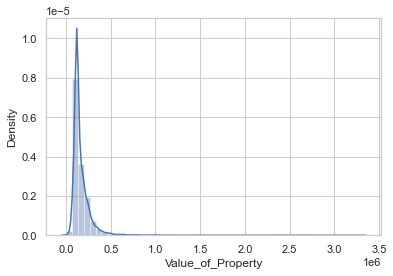

In [264]:
# Value_of_Property: Extreme Right Skewed
sns.distplot(df['Value_of_Property'])

/Users/sameershekhar/Documents/Interview/PPI_CrossSell/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_Score', ylabel='Density'>

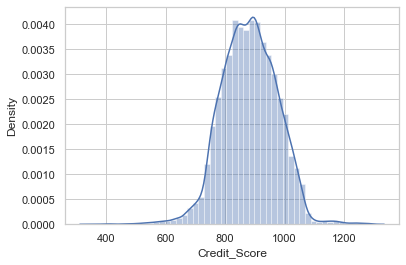

In [265]:
# Credit_Score : Fairly Symmetrical (Left)
sns.distplot(df['Credit_Score'])

/Users/sameershekhar/Documents/Interview/PPI_CrossSell/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='APR', ylabel='Density'>

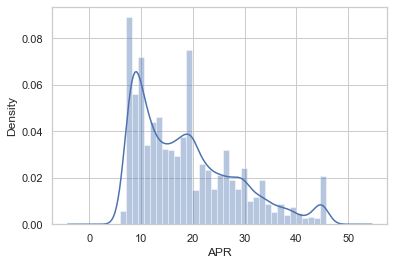

In [266]:
#Income_Range: Moderate Right Skewed
sns.distplot(df['APR'])

### Outliers Detection

In [267]:
def outliers(df:pd.DataFrame)->pd.DataFrame:
    try:
        q1 = []
        q3 = []
        iqr = []
        outlier = []
        for name in num_columns:
            Q1 = df[name].quantile(0.25)
            q1.append(Q1)
            Q3 = df[name].quantile(0.75) 
            q3.append(Q3)      
            
            IQR = Q3- Q1
            iqr.append(IQR)
            upper =  (df[name].quantile(0.75)) + (1.5*IQR)
            lower =  (df[name].quantile(0.25)) - (1.5*IQR)

            if min(df[name]) < lower or max(df[name]) > upper:
                outlier.append("HasOutliers")
            else:
                outlier.append("NoOutliers")
        data = list(zip(q1, q3, iqr, outlier))
        column_names = ["Q1","Q3","IQR","Outliers"]
        describe_df = pd.DataFrame(data, index=num_columns, columns=column_names)
            
        return describe_df
    except Exception as e:
        print(str(e))

### Observation

- 30 numerical columns have outliers and 7 do not have any outliers

- List of columns with outliers 
`['Credit_Score', 'Term', 'Net_Advance', 'APR', 'Mosaic', 'Mosaic_Class', 'Time_at_Address', 'Number_of_Dependants', 'Time_in_Employment', 'Time_with_Bank', 'Value_of_Property', 'Outstanding_Mortgage_Bal', 'Total_Outstanding_Balances', 'Bureau_Data___Monthly_Other_Co_R', 'Age', 'Total_outstanding_balance__mortg', 'Total___Public_Info___CCJ____ban', 'Total_value__Public_Info___CCJ__', 'Time_since_most_recent_Public_In', 'Total_value__CAIS_8_9s', 'Worst_status_L6m', 'Worst_CUrrent_Status', '__of_status_3_s_L6m', 'Searches___Total___L6m', 'Years_on_ER_for_SP', 'Total___outstanding_CCJ_s', 'Total_outstanding_balance___excl', 'Time_since_most_recent_outstandi', 'code', 'PPI_JOINT', 'PPI_LCI']`

- List of columns with NO outliers 
`['Ref','Income_Range', 'Worst_History_CT', 'Total___of_accounts',code, 'PPI', 'PPI_SINGLE']`

In [268]:
outlier_df = outliers(df[num_columns])

outlier_df

,Q1,Q3,IQR,Outliers
Ref,10699.0,31689.0,20990.0,NoOutliers
Credit_Score,818.0,947.0,129.0,HasOutliers
Term,48.0,60.0,12.0,HasOutliers
Net_Advance,3000.0,9000.0,6000.0,HasOutliers
APR,9.9,24.9,15.0,HasOutliers
Mosaic,16.0,44.0,28.0,HasOutliers
Mosaic_Class,3.0,8.0,5.0,HasOutliers
Time_at_Address,38.0,180.0,142.0,HasOutliers
Number_of_Dependants,0.0,1.0,1.0,HasOutliers
Time_in_Employment,38.0,144.0,106.0,HasOutliers


/Users/sameershekhar/Documents/Interview/PPI_CrossSell/venv/lib/python3.8/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/sameershekhar/Documents/Interview/PPI_CrossSell/venv/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


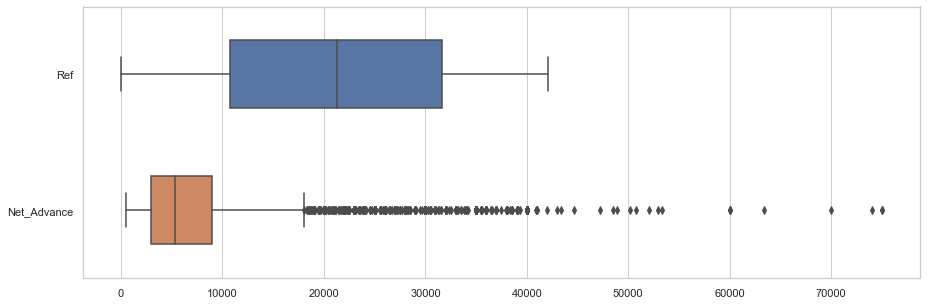

In [269]:
#Verifying the outliers data
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15,5))
boxplots = sns.boxplot(data=df[['Ref','Net_Advance' ]], width=0.5,orient='h')

<AxesSubplot:xlabel='Credit_Score'>

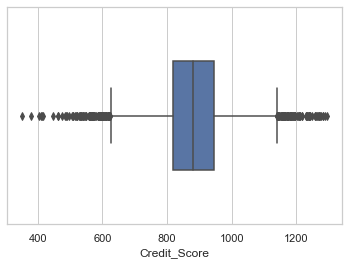

In [270]:
sns.boxplot(x=df['Credit_Score'], width=0.5, orient='h')

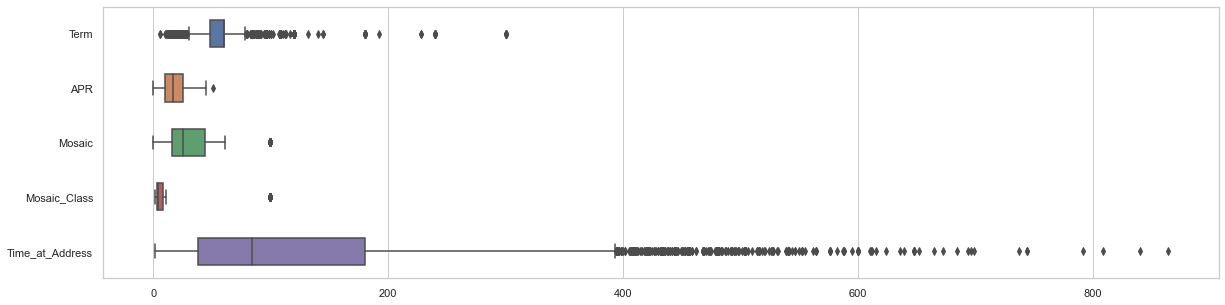

In [271]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(figsize=(20,5))
boxplots = sns.boxplot(data=df[['Term', 'APR', 'Mosaic', 'Mosaic_Class', 'Time_at_Address']], width=0.5, orient='h')



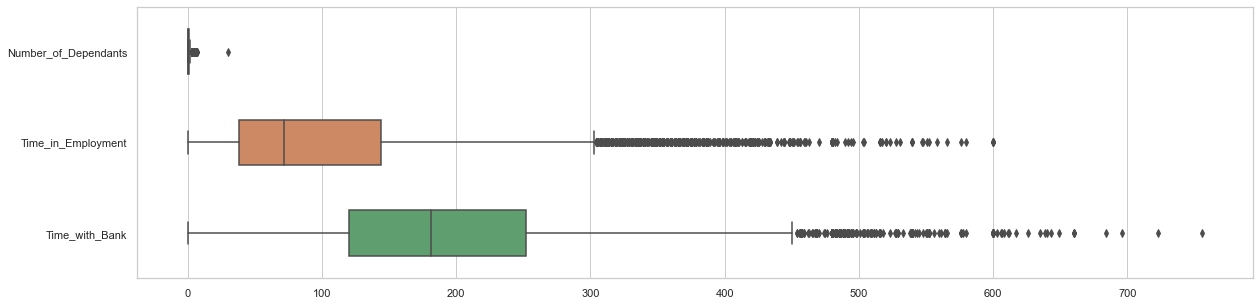

In [272]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(figsize=(20,5))
boxplots = sns.boxplot(data=df[['Number_of_Dependants','Time_in_Employment','Time_with_Bank']], width=0.5, orient='h')


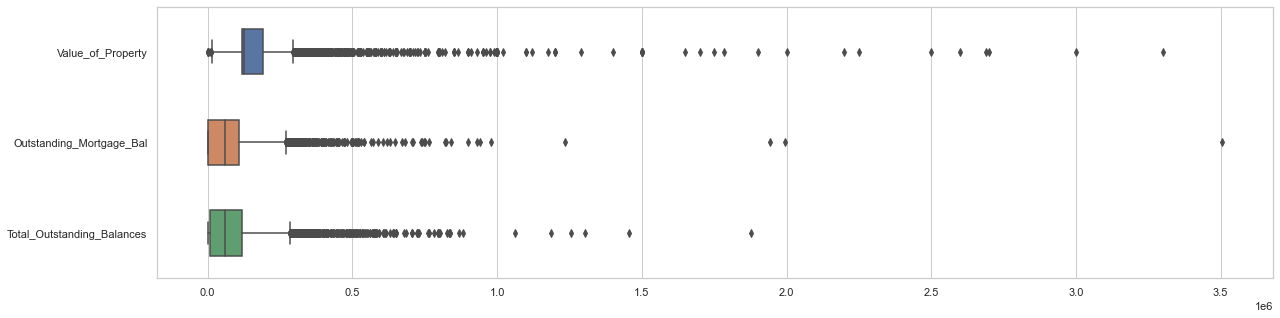

In [273]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(figsize=(20,5))
boxplots = sns.boxplot(data=df[['Value_of_Property', 'Outstanding_Mortgage_Bal','Total_Outstanding_Balances']], width=0.5, orient='h')

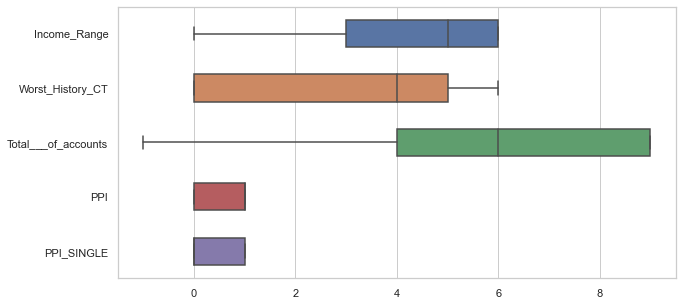

In [274]:
sns.set_style(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
boxplots = sns.boxplot(data=df[['Income_Range', 'Worst_History_CT', 'Total___of_accounts', 'PPI', 'PPI_SINGLE']], width=0.5, orient='h')

# Analysis for Categorical Variables

### Observations

- 12 columns have 2 unique values:
`['ACCESS_Card', 'Loan_Type', 'Telephone_Indicator, Gender', 'Full_Part_Time_Empl_Ind', 'Perm_Temp_Empl_Ind', 'Current_Account', 'Other_Credit_Store_Card', 'VISA_Card', 'American_Express', 'Diners_Card', 'Cheque_Guarantee']`

- 3 columns have 3 unique values:
`['CIFAS_detected', 'Bankruptcy_Detected__SP_', 'Payment_Method']`

- 3 columns have 4 unique values
`['category', 'Marital_Status', 'Residential_Status']`

- Remaining columns have 9, 10, 15 and 24 unique values respectively
`['Employment_Status', 'Final_Grade', 'prdt_desc', 'Insurance_Description'	]`

In [275]:
df.describe(include=['object']).T.sort_values(by='unique')

,count,unique,top,freq
ACCESS_Card,16383,2,FALSE,13028
Loan_Type,16383,2,UnSecured,13054
Telephone_Indicator,16383,2,Y,15241
Gender,16383,2,M,9770
Full_Part_Time_Empl_Ind,16383,2,F,16308
Perm_Temp_Empl_Ind,16383,2,P,16361
Current_Account,16383,2,TRUE,16351
Other_Credit_Store_Card,16383,2,FALSE,12976
VISA_Card,16383,2,TRUE,12087
American_Express,16383,2,FALSE,16227
